# CSC 580
# Hithesh Shanmugam
# Assignment 2

In [1]:
!pip install gymnasium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.1/879.1 KB 19.4 MB/s eta 0:00:00


In [2]:
import gymnasium as gym
import numpy as np 
import matplotlib.pyplot as plt #importing library for plotting histogram

# Create a FrozenLake 8x8 environment using OpenAI/Gymnasium
env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=True, render_mode="ansi")

# Reset the environment and display it (in ansi ascii)
env.reset()
print (env.render())  # wrap render() in print()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG



In [3]:
nS = env.observation_space.n    # number of states -- 8x8=64
nA = env.action_space.n         # number of actions -- four directions; 0:left, 1:down, 2:right, 3:up
print ("{}, {}".format(nS, nA))

64, 4


In [4]:
# Probatilies from State 0
env.P[0]

{0: [(0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 8, 0.0, False)],
 1: [(0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 8, 0.0, False),
  (0.3333333333333333, 1, 0.0, False)],
 2: [(0.3333333333333333, 8, 0.0, False),
  (0.3333333333333333, 1, 0.0, False),
  (0.3333333333333333, 0, 0.0, False)],
 3: [(0.3333333333333333, 1, 0.0, False),
  (0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 0, 0.0, False)]}

In [5]:
# Probatilies from State 62 (left of the Goal state)
env.P[62]

{0: [(0.3333333333333333, 54, 0.0, True),
  (0.3333333333333333, 61, 0.0, False),
  (0.3333333333333333, 62, 0.0, False)],
 1: [(0.3333333333333333, 61, 0.0, False),
  (0.3333333333333333, 62, 0.0, False),
  (0.3333333333333333, 63, 1.0, True)],
 2: [(0.3333333333333333, 62, 0.0, False),
  (0.3333333333333333, 63, 1.0, True),
  (0.3333333333333333, 54, 0.0, True)],
 3: [(0.3333333333333333, 63, 1.0, True),
  (0.3333333333333333, 54, 0.0, True),
  (0.3333333333333333, 61, 0.0, False)]}

**** Functions to create a fixed deterministic policy, and to run one experiment for a given number of episodes**

In [11]:
def generate_random_policy(num_actions, num_states, seed=None):
    """
    A policy is a 1D array of length # of states, where each element is a
    number between 0 (inclusive) and # of actions (exclusive) randomly chosen.
    If a specific seed is passed, the same numbers are genereated, while
    if the seed is None, the numbers are unpredictable every time.
    """
    rng = np.random.default_rng(seed)
    return rng.integers(low=0, high=num_actions, size=num_states)


def run_oneexperiment(env, policy, num_episodes, display=False):
    """
    Run one experiment, when agent follows a policy, for a given number of episodes.
    """    
    # Count the number of goals made and getting stuck in a hole
    goals = 0
    holes = 0
    # Total rewards and steps
    total_rewards = 0
    total_goal_steps = 0
    goal_reached = [] #initializing an empty list to keep track whether it reached the goal
    successful_runs=[] #initializing an empty list to keep track of the successful runs
    stepss=[] #initializing an empty list to keep track of the steps
    number_of_exp=100 #for 100 experiments

    
    for _ in range(number_of_exp):
        # For each time,
        env.reset()
        done = False
        rewards = 0
        steps = 0
        episode_number = 1 # assigning a variable for checking the episode number

        if display:
            episode = [(env.env.s)] # initial state (in a tuple)

        while not done:
          for j in range(num_episodes):#making it run for number of episodes
            # choose the action based on the policy
            state = env.s
            action = policy[state]

            # take the action
            next_state, reward, done, info, p = env.step(action)
            steps += 1
            episode_number += 1# incrementing the episode number

            # extend the episode
            if display:
                episode.append(tuple([action,next_state]))
            # accumulate rewards
            rewards += reward
        
            # Calculate stats
            total_rewards += rewards
            if reward == 1.0: # Goal, or env.s == 63
              goals += 1
              total_goal_steps += steps
              goal_reached.append(episode_number)#appending which episode number is successful
              successful_runs.append(1)# appending 1 if the reward is 1.0
              stepss.append(episode_number)#appending the episode number in the steps to calculate the average steps
            else:
              holes += 1
              successful_runs.append(0)#appending 0 if the reward is not 1.0
            # Display
            if display:
              print (env.render())

    # Compute the mean and standard deviation of the number of successful runs
    mean_successful_runs = np.mean(successful_runs)#calculating and storing the mean
    stdev_successful_runs = np.std(successful_runs)#calculating and storing the standard deviation

    # Compute the average number of steps that took to reach the goal
    average_steps = np.mean(stepss)#calculating the average number of steps

    # Print the results
    print(f'Mean successful runs: {mean_successful_runs}')#printing mean
    print(f'Standard deviation of successful runs: {stdev_successful_runs}')#printing standard deviation
    print(f'Average number of steps that took to reach the goal: {average_steps}')#printing the average number of steps

    # One experiment finished,
    return goals, holes, total_rewards, total_goal_steps,goal_reached# additionaly returning goal_reached to calculate the histogram

**100 experiment run**

## Part 1
### Seed =17

In [13]:
policy1 = generate_random_policy(nA, nS, 17) # change seed to a specific number, or None (default)
print ("*** Policy ***\n{}".format(policy1))
num_episodes = 10000
num_experiments=100
goals1, holes1, total_rewards1, total_goal_steps1,goal_reached1 \
    = run_oneexperiment(env, policy1, num_episodes)

percent_goal1 = goals1 / num_episodes*num_experiments
percent_hole1 = holes1 / num_episodes*num_experiments
mean_reward1 = total_rewards1 / num_episodes*num_experiments
mean_goal_steps1 = 0.0 if (goals1 == 0) else (total_goal_steps1 / goals1)

print ("\n*** RESULTS ***:\nGoals: {:>5d}/{} = {:>7.3%}\nHoles: {:>5d}/{} = {:>7.3%}"
       .format(goals1, num_episodes, percent_goal1, holes1, num_episodes, percent_hole1))
print("mean reward:          {:.5f}\nmean goal steps:     {:.2f}".format(mean_reward1, mean_goal_steps1))

*** Policy ***
[2 3 0 0 1 2 3 1 0 0 1 1 3 1 2 2 0 2 0 0 2 1 1 2 0 0 2 3 2 3 1 0 2 2 2 2 1
 0 2 0 1 0 2 1 1 2 0 1 2 3 0 3 1 1 3 0 0 1 2 3 1 1 3 3]
Mean successful runs: 1e-06
Standard deviation of successful runs: 0.0009999994999998747
Average number of steps that took to reach the goal: 59.0

*** RESULTS ***:
Goals:     1/1000000 =  1.000%
Holes: 999999/1000000 = 999999.000%
mean reward:          99.43000
mean goal steps:     58.00


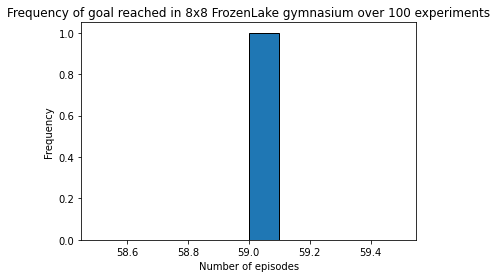

In [39]:
# using matplotlib to create a histogram
plt.hist(goal_reached1,bins=10, edgecolor = "black")

# add labels and title to the histogram
plt.xlabel('Number of episodes')#giving label for the x axis
plt.ylabel('Frequency')#giving label for the y axis
plt.title('Frequency of goal reached in 8x8 FrozenLake gymnasium over 100 experiments')#giving the title for the plot
# display the histogram
plt.show()

### Seed=25

In [17]:
policy2 = generate_random_policy(nA, nS, 25) # change seed to a specific number, or None (default)
print ("*** Policy ***\n{}".format(policy2))
num_episodes = 10000

goals2, holes2, total_rewards2, total_goal_steps2,goal_reached2 \
    = run_oneexperiment(env, policy2, num_episodes)

percent_goal2 = goals2 / num_episodes*num_experiments
percent_hole2 = holes2 / num_episodes*num_experiments
mean_reward2 = total_rewards2 / num_episodes*num_experiments
mean_goal_steps2 = 0.0 if (goals2 == 0) else (total_goal_steps2 / goals2)

print ("\n*** RESULTS ***:\nGoals: {:>5d}/{} = {:>7.3%}\nHoles: {:>5d}/{} = {:>7.3%}"
       .format(goals2, num_episodes, percent_goal2, holes2, num_episodes, percent_hole2))
print("mean reward:          {:.5f}\nmean goal steps:     {:.2f}".format(mean_reward2, mean_goal_steps2))

*** Policy ***
[2 0 3 0 0 0 2 1 0 0 2 0 1 3 2 3 2 0 0 0 0 3 0 3 1 1 0 3 1 0 2 2 1 2 2 3 1
 1 3 1 1 1 2 0 1 2 3 2 2 2 1 2 2 2 0 0 0 1 1 1 3 0 1 2]
Mean successful runs: 0.0
Standard deviation of successful runs: 0.0
Average number of steps that took to reach the goal: nan

*** RESULTS ***:
Goals:     0/1000000 =  0.000%
Holes: 1000000/1000000 = 1000000.000%
mean reward:          0.00000
mean goal steps:     0.00


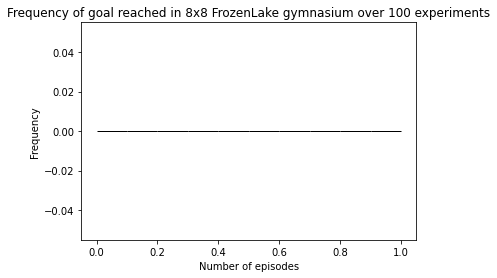

In [38]:
# using matplotlib to create a histogram
plt.hist(goal_reached2,bins=10, edgecolor = "black")

# add labels and title to the histogram
plt.xlabel('Number of episodes')#giving label for the x axis
plt.ylabel('Frequency')#giving label for the y axis
plt.title('Frequency of goal reached in 8x8 FrozenLake gymnasium over 100 experiments')#giving the title for the plot
# display the histogram
plt.show()

### Seed =100

In [18]:
policy3 = generate_random_policy(nA, nS, 100) # change seed to a specific number, or None (default)
print ("*** Policy ***\n{}".format(policy3))
num_episodes = 10000

goals3, holes3, total_rewards3, total_goal_steps3,goal_reached3 \
    = run_oneexperiment(env, policy3, num_episodes)

percent_goal3= goals3 / num_episodes*num_experiments
percent_hole3 = holes3 / num_episodes*num_experiments
mean_reward3 = total_rewards3 / num_episodes*num_experiments
mean_goal_steps3 = 0.0 if (goals3 == 0) else (total_goal_steps3 / goals3)

print ("\n*** RESULTS ***:\nGoals: {:>5d}/{} = {:>7.3%}\nHoles: {:>5d}/{} = {:>7.3%}"
       .format(goals3, num_episodes, percent_goal3, holes3, num_episodes, percent_hole3))
print("mean reward:          {:.5f}\nmean goal steps:     {:.2f}".format(mean_reward3, mean_goal_steps3))

*** Policy ***
[3 3 0 2 0 1 1 0 2 3 3 2 1 3 3 3 0 2 2 0 2 3 2 1 1 2 0 2 2 2 3 2 2 3 0 2 0
 3 0 1 0 3 1 3 3 1 1 1 3 3 1 3 3 2 2 1 3 1 2 0 2 2 0 0]
Mean successful runs: 0.0
Standard deviation of successful runs: 0.0
Average number of steps that took to reach the goal: nan

*** RESULTS ***:
Goals:     0/1000000 =  0.000%
Holes: 1000000/1000000 = 1000000.000%
mean reward:          0.00000
mean goal steps:     0.00


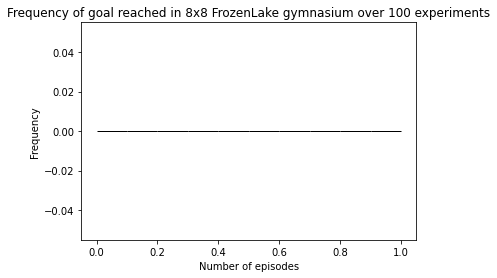

In [37]:
# using matplotlib to create a histogram
plt.hist(goal_reached3,bins=10, edgecolor = "black")

# add labels and title to the histogram
plt.xlabel('Number of episodes')#giving label for the x axis
plt.ylabel('Frequency')#giving label for the y axis
plt.title('Frequency of goal reached in 8x8 FrozenLake gymnasium over 100 experiments')#giving the title for the plot
# display the histogram
plt.show()

### Seed=200

In [21]:
policy4 = generate_random_policy(nA, nS, 200) # change seed to a specific number, or None (default)
print ("*** Policy ***\n{}".format(policy4))
num_episodes = 10000

goals4, holes4, total_rewards4, total_goal_steps4,goal_reached4 \
    = run_oneexperiment(env, policy4, num_episodes)

percent_goal4 = goals4 / num_episodes*num_experiments
percent_hole4 = holes4 / num_episodes*num_experiments
mean_reward4 = total_rewards4 / num_episodes*num_experiments
mean_goal_steps4 = 0.0 if (goals4 == 0) else (total_goal_steps4 / goals4)

print ("\n*** RESULTS ***:\nGoals: {:>5d}/{} = {:>7.3%}\nHoles: {:>5d}/{} = {:>7.3%}"
       .format(goals4, num_episodes, percent_goal4, holes4, num_episodes, percent_hole4))
print("mean reward:          {:.5f}\nmean goal steps:     {:.2f}".format(mean_reward4, mean_goal_steps4))

*** Policy ***
[0 2 0 2 1 0 2 0 3 2 1 2 1 2 1 1 2 0 2 1 1 1 2 0 2 0 0 3 3 2 3 0 2 0 3 1 0
 2 3 3 0 0 2 1 0 3 3 3 3 2 2 1 2 2 2 0 3 2 2 0 3 1 2 2]
Mean successful runs: 0.0
Standard deviation of successful runs: 0.0
Average number of steps that took to reach the goal: nan

*** RESULTS ***:
Goals:     0/1000000 =  0.000%
Holes: 1000000/1000000 = 1000000.000%
mean reward:          0.00000
mean goal steps:     0.00


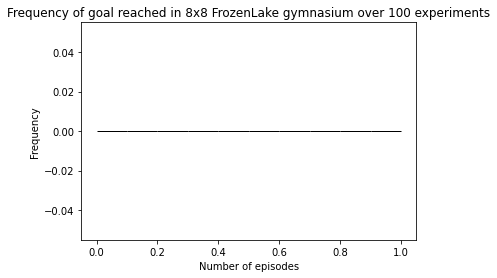

In [36]:
# using matplotlib to create a histogram
plt.hist(goal_reached4,bins=10, edgecolor = "black")

# add labels and title to the histogram
plt.xlabel('Number of episodes')#giving label for the x axis
plt.ylabel('Frequency')#giving label for the y axis
plt.title('Frequency of goal reached in 8x8 FrozenLake gymnasium over 100 experiments')#giving the title for the plot
# display the histogram
plt.show()

### Seed=500 

In [23]:
policy5 = generate_random_policy(nA, nS, 500) # change seed to a specific number, or None (default)
print ("*** Policy ***\n{}".format(policy5))
num_episodes = 10000

goals5, holes5, total_rewards5, total_goal_steps5,goal_reached5 \
    = run_oneexperiment(env, policy5, num_episodes)

percent_goal5 = goals5 / num_episodes*num_experiments
percent_hole5 = holes5 / num_episodes*num_experiments
mean_reward5 = total_rewards5 / num_episodes*num_experiments
mean_goal_steps5 = 0.0 if (goals5 == 0) else (total_goal_steps5 / goals5)

print ("\n*** RESULTS ***:\nGoals: {:>5d}/{} = {:>7.3%}\nHoles: {:>5d}/{} = {:>7.3%}"
       .format(goals5, num_episodes, percent_goal5, holes5, num_episodes, percent_hole5))
print("mean reward:          {:.5f}\nmean goal steps:     {:.2f}".format(mean_reward5, mean_goal_steps5))

*** Policy ***
[2 2 1 3 1 2 0 1 0 1 3 3 0 1 2 3 3 1 0 0 1 1 1 3 0 2 2 2 3 1 1 3 2 1 1 3 0
 0 3 1 1 1 2 2 2 1 3 1 2 0 0 0 3 1 0 1 1 1 1 2 1 3 2 3]
Mean successful runs: 1e-06
Standard deviation of successful runs: 0.0009999994999998736
Average number of steps that took to reach the goal: 68.0

*** RESULTS ***:
Goals:     1/10000 =  1.000%
Holes: 999999/10000 = 999999.000%
mean reward:          99.34000
mean goal steps:     67.00


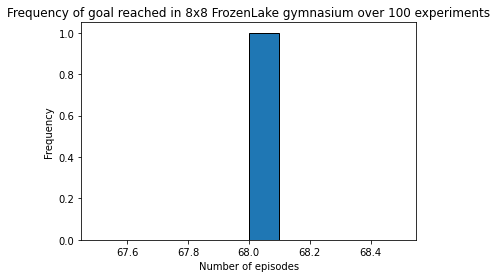

In [35]:
# using matplotlib to create a histogram
plt.hist(goal_reached5,bins=10, edgecolor = "black")

# add labels and title to the histogram
plt.xlabel('Number of episodes')#giving label for the x axis
plt.ylabel('Frequency')#giving label for the y axis
plt.title('Frequency of goal reached in 8x8 FrozenLake gymnasium over 100 experiments')#giving the title for the plot
# display the histogram
plt.show()

## Value Iteration Function

In [ ]:
#value iteration policy
P=env.P# initializing P from the environment
def value_iteration(P, nS, nA, gamma=1.0, theta=1e-3):#the arguments passed are P from env nS and nA from before as number of states and actions respectively also the discount factor and theta

    value_function = np.zeros(nS)#initializing a list for value function with zeros for the length of number of states
    policy = np.zeros(nS, dtype=int)#initializing a list for policy with zeros for the length of number of states

    # Value iteration is like policy iteration, except estimation of the value function is done by maximizing over actions
    # After the value function converges, one step is done that find the action that maximizes reward

    error = 1 # initializing the delta to compare it with theta
    # Iterate value function, find optimal
    while error > theta:
        new_value_function = np.zeros(nS)# initializing an array of zeroes for new value function
        for s in range(nS):# s is for states
            Qs = np.zeros(nA)# initializing an array to calculate value function
            for a in range(nA):# a is for actions
                transitions = P[s][a]# storing the probabilities in a variable
                for transition in transitions:# initializing a loop
                    prob, nextS, reward, term = transition# assigning variables from the probabilities 
                    Qs[a] += prob*(reward + gamma*value_function[nextS])# implementing the state value update
            new_value_function[s] = max(Qs)#storing the maximum of calculated in the new value function
        diff_vf = new_value_function-value_function# calculating the difference
        value_function = new_value_function# updating the value function
        error = np.linalg.norm(diff_vf)# updating the error

    # Get policy from value function
    for s in range(nS):# s is for states
        Qs = np.zeros(nA)# initializing an array to calculate optimal policy
        for a in range(nA):# a is for actions
            transitions = P[s][a]# storing the probabilities in a variable
            for transition in transitions:# initializing a loop
                prob, nextS, reward, term = transition# assigning variables from the probabilities
                Qs[a] += prob*(reward + gamma*value_function[nextS])# implementing the state value update
            max_as = np.where(Qs==Qs.max())#storing the maximum value
            max_as = max_as[0]#updating the max
        policy[s] = max_as[0]#updating the policy


    return value_function, policy #returning the calculated V(s) and policy

## Part 2
### gamma=1.0, theta=1e-3

In [49]:
value,policy = value_iteration(P, nS, nA, gamma=1.0, theta=1e-3)
print ("*** Policy ***\n{}".format(policy))
print ("*** Converged V(s) table ***\n{}".format(value))
num_episodes = 10000

goals, holes, total_rewards, total_goal_steps,goal_reached \
    = run_oneexperiment(env, policy, num_episodes)

percent_goal = goals / num_episodes*num_experiments
percent_hole = holes / num_episodes*num_experiments
mean_reward = total_rewards / num_episodes*num_experiments
mean_goal_steps = 0.0 if (goals == 0) else (total_goal_steps / goals)

print ("\n*** RESULTS ***:\nGoals: {:>5d}/{} = {:>7.3%}\nHoles: {:>5d}/{} = {:>7.3%}"
       .format(goals, num_episodes, percent_goal, holes, num_episodes, percent_hole))
print("mean reward:          {:.5f}\nmean goal steps:     {:.2f}".format(mean_reward, mean_goal_steps))

*** Policy ***
[3 2 2 2 2 2 2 2 3 3 3 3 3 3 3 2 0 0 0 0 2 3 3 2 0 0 0 1 0 0 2 2 0 3 0 0 2
 1 3 2 0 0 0 1 3 0 0 2 0 0 1 0 0 0 0 2 0 1 0 0 1 2 1 0]
*** Converged V(s) table ***
[0.99233504 0.99267    0.9931538  0.9936812  0.99421294 0.99472148
 0.99517613 0.99550887 0.99225148 0.99250653 0.99292559 0.9934256
 0.99395733 0.99449751 0.99505422 0.99570516 0.98714692 0.96620417
 0.91601613 0.         0.85107703 0.94087111 0.97726936 0.99608915
 0.98257085 0.91945431 0.78935145 0.46925266 0.61863752 0.
 0.94082643 0.99664406 0.97869199 0.81019774 0.53306039 0.
 0.53579015 0.60815637 0.84873104 0.99734564 0.97565232 0.
 0.         0.1664103  0.38072402 0.44007424 0.         0.99816323
 0.97356251 0.         0.18939679 0.11857214 0.         0.33143327
 0.         0.9990611  0.97249835 0.71075867 0.44982162 0.
 0.27712577 0.55426567 0.77712577 0.        ]
Mean successful runs: 0.0001
Standard deviation of successful runs: 0.009999499987499386
Average number of steps that took to reach the goal: 

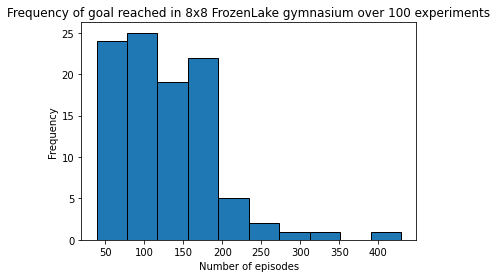

In [50]:
# using matplotlib to create a histogram
plt.hist(goal_reached,bins=10, edgecolor = "black")

# add labels and title to the histogram
plt.xlabel('Number of episodes')#giving label for the x axis
plt.ylabel('Frequency')#giving label for the y axis
plt.title('Frequency of goal reached in 8x8 FrozenLake gymnasium over 100 experiments')#giving the title for the plot
# display the histogram
plt.show()

###  gamma=1.0, theta=1e-4

In [52]:
value6,policy6 = value_iteration(P, nS, nA, gamma=1.0, theta=1e-4)
print ("*** Policy ***\n{}".format(policy6))
print ("*** Converged V(s) table ***\n{}".format(value6))
num_episodes = 10000

goals6, holes6, total_rewards6, total_goal_steps6,goal_reached6 \
    = run_oneexperiment(env, policy6, num_episodes)

percent_goal6 = goals6 / num_episodes*num_experiments
percent_hole6 = holes6 / num_episodes*num_experiments
mean_reward6 = total_rewards6 / num_episodes*num_experiments
mean_goal_steps6 = 0.0 if (goals6 == 0) else (total_goal_steps6 / goals6)

print ("\n*** RESULTS ***:\nGoals: {:>5d}/{} = {:>7.3%}\nHoles: {:>5d}/{} = {:>7.3%}"
       .format(goals6, num_episodes, percent_goal6, holes6, num_episodes, percent_hole6))
print("mean reward:          {:.5f}\nmean goal steps:     {:.2f}".format(mean_reward6, mean_goal_steps6))

*** Policy ***
[3 2 2 2 2 2 2 2 3 3 3 3 3 3 3 2 0 0 0 0 2 3 3 2 0 0 0 1 0 0 2 2 0 3 0 0 2
 1 3 2 0 0 0 1 3 0 0 2 0 0 1 0 0 0 0 2 0 1 0 0 1 2 1 0]
*** Converged V(s) table ***
[0.99936753 0.99939517 0.9994351  0.99947862 0.9995225  0.99956446
 0.99960198 0.99962943 0.99936064 0.99938168 0.99941627 0.99945753
 0.9995014  0.99954598 0.99959192 0.99964563 0.99883211 0.97711777
 0.92549914 0.         0.85614983 0.94578511 0.98167898 0.99967731
 0.99835343 0.93318584 0.80000329 0.47438821 0.62318331 0.
 0.94435755 0.9997231  0.99794439 0.82414646 0.54137107 0.
 0.53903075 0.6109269  0.85168455 0.99978099 0.99762189 0.
 0.         0.16788848 0.38299548 0.44207674 0.         0.99984845
 0.99739921 0.         0.19415037 0.12067642 0.         0.33231612
 0.         0.99992253 0.99728553 0.72949795 0.46179657 0.
 0.277437   0.5548753  0.777437   0.        ]
Mean successful runs: 0.0001
Standard deviation of successful runs: 0.009999499987499386
Average number of steps that took to reach the goal:

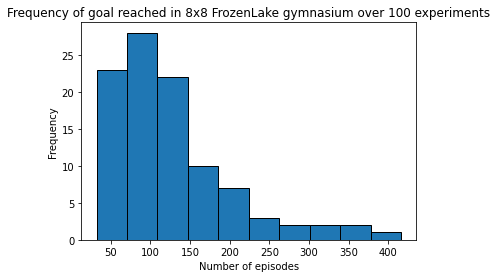

In [60]:
# using matplotlib to create a histogram
plt.hist(goal_reached6,bins=10, edgecolor = "black")

# add labels and title to the histogram
plt.xlabel('Number of episodes')#giving label for the x axis
plt.ylabel('Frequency')#giving label for the y axis
plt.title('Frequency of goal reached in 8x8 FrozenLake gymnasium over 100 experiments')#giving the title for the plot
# display the histogram
plt.show()

### gamma=1.0, theta=1e-5

In [55]:
value7,policy7 = value_iteration(P, nS, nA, gamma=1.0, theta=1e-5)
print ("*** Policy ***\n{}".format(policy7))
print ("*** Converged V(s) table ***\n{}".format(value7))
num_episodes = 10000

goals7, holes7, total_rewards7, total_goal_steps7,goal_reached7 \
    = run_oneexperiment(env, policy7, num_episodes)

percent_goal7 = goals7 / num_episodes*num_experiments
percent_hole7 = holes7 / num_episodes*num_experiments
mean_reward7 = total_rewards7 / num_episodes*num_experiments
mean_goal_steps7 = 0.0 if (goals7 == 0) else (total_goal_steps7 / goals7)

print ("\n*** RESULTS ***:\nGoals: {:>5d}/{} = {:>7.3%}\nHoles: {:>5d}/{} = {:>7.3%}"
       .format(goals7, num_episodes, percent_goal7, holes7, num_episodes, percent_hole7))
print("mean reward:          {:.5f}\nmean goal steps:     {:.2f}".format(mean_reward7, mean_goal_steps7))

*** Policy ***
[3 2 2 2 2 2 2 2 3 3 3 3 3 3 3 2 0 0 0 0 2 3 3 2 0 0 0 1 0 0 2 2 0 3 0 0 2
 1 3 2 0 0 0 1 3 0 0 2 0 0 1 0 0 0 0 2 0 1 0 0 1 2 1 0]
*** Converged V(s) table ***
[0.99994131 0.99994388 0.99994758 0.99995162 0.99995569 0.99995959
 0.99996307 0.99996562 0.99994067 0.99994263 0.99994584 0.99994966
 0.99995374 0.99995787 0.99996213 0.99996712 0.99988743 0.97809738
 0.92634127 0.         0.85657386 0.94619004 0.98204021 0.99997006
 0.99983905 0.93446661 0.80098446 0.47485401 0.62357972 0.
 0.94464783 0.99997431 0.9997976  0.82546936 0.54215006 0.
 0.53931309 0.61116444 0.85193028 0.99997968 0.99976487 0.
 0.         0.16802597 0.38319639 0.44225103 0.         0.99998594
 0.99974224 0.         0.19462149 0.12088216 0.         0.33239306
 0.         0.99999281 0.99973068 0.73135322 0.46298454 0.
 0.27746419 0.5549285  0.77746419 0.        ]
Mean successful runs: 0.0001
Standard deviation of successful runs: 0.009999499987499386
Average number of steps that took to reach the goal:

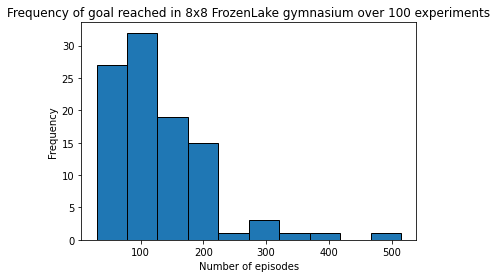

In [61]:
# using matplotlib to create a histogram
plt.hist(goal_reached7,bins=10, edgecolor = "black")

# add labels and title to the histogram
plt.xlabel('Number of episodes')#giving label for the x axis
plt.ylabel('Frequency')#giving label for the y axis
plt.title('Frequency of goal reached in 8x8 FrozenLake gymnasium over 100 experiments')#giving the title for the plot
# display the histogram
plt.show()

### gamma=0.98, theta=1e-3

In [56]:
value8,policy8= value_iteration(P, nS, nA, gamma=0.98, theta=1e-3)
print ("*** Policy ***\n{}".format(policy8))
print ("*** Converged V(s) table ***\n{}".format(value8))

goals8, holes8, total_rewards8, total_goal_steps8,goal_reached8 \
    = run_oneexperiment(env, policy8, num_episodes)

percent_goal8 = goals8 / num_episodes*num_experiments
percent_hole8 = holes8 / num_episodes*num_experiments
mean_reward8 = total_rewards8 / num_episodes*num_experiments
mean_goal_steps8 = 0.0 if (goals8 == 0) else (total_goal_steps / goals8)

print ("\n*** RESULTS ***:\nGoals: {:>5d}/{} = {:>7.3%}\nHoles: {:>5d}/{} = {:>7.3%}"
       .format(goals8, num_episodes, percent_goal8, holes8, num_episodes, percent_hole8))
print("mean reward:          {:.5f}\nmean goal steps:     {:.2f}".format(mean_reward8, mean_goal_steps8))

*** Policy ***
[3 2 2 2 2 2 2 2 3 3 3 3 3 2 2 1 3 3 0 0 2 3 2 1 3 3 3 1 0 0 2 2 3 3 0 0 2
 1 3 2 0 0 0 1 3 0 0 2 0 0 1 0 0 0 0 2 0 1 0 0 1 1 1 0]
*** Converged V(s) table ***
[0.21287434 0.22646383 0.24727233 0.27223637 0.30004541 0.32797537
 0.34714412 0.35374826 0.20975596 0.22004417 0.23792424 0.26152128
 0.29086331 0.32922478 0.36211843 0.37572606 0.19850181 0.19997382
 0.19416721 0.         0.25880598 0.31806685 0.38596441 0.41263652
 0.18124252 0.17564392 0.15699241 0.11120505 0.18366382 0.
 0.40705141 0.46484244 0.15540689 0.13961228 0.09679253 0.
 0.19248213 0.2581864  0.39551952 0.54574878 0.13145928 0.
 0.         0.05685794 0.14757281 0.20254284 0.         0.66026383
 0.11620149 0.         0.02450096 0.02655219 0.         0.21438817
 0.         0.81534098 0.10877929 0.07607022 0.04860653 0.
 0.22015445 0.45378774 0.71520395 0.        ]
Mean successful runs: 8.9e-05
Standard deviation of successful runs: 0.009433561310554986
Average number of steps that took to reach the goal

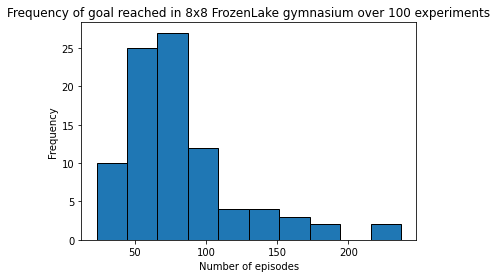

In [62]:
# using matplotlib to create a histogram
plt.hist(goal_reached8,bins=10, edgecolor = "black")

# add labels and title to the histogram
plt.xlabel('Number of episodes')#giving label for the x axis
plt.ylabel('Frequency')#giving label for the y axis
plt.title('Frequency of goal reached in 8x8 FrozenLake gymnasium over 100 experiments')#giving the title for the plot
# display the histogram
plt.show()

###  gamma=1.0, theta=1e-15

In [59]:
value9,policy9 = value_iteration(P, nS, nA, gamma=1.0, theta=1e-15)
print ("*** Policy ***\n{}".format(policy9))
print ("*** Converged V(s) table ***\n{}".format(value9))

goals9, holes9, total_rewards9, total_goal_steps9,goal_reached9 \
    = run_oneexperiment(env, policy9, num_episodes)

percent_goal9 = goals9 / num_episodes*num_experiments
percent_hole9 = holes9 / num_episodes*num_experiments
mean_reward9 = total_rewards9 / num_episodes*num_experiments
mean_goal_steps9 = 0.0 if (goals9 == 0) else (total_goal_steps9 / goals9)

print ("\n*** RESULTS ***:\nGoals: {:>5d}/{} = {:>7.3%}\nHoles: {:>5d}/{} = {:>7.3%}"
       .format(goals9, num_episodes, percent_goal9, holes9, num_episodes, percent_hole9))
print("mean reward:          {:.5f}\nmean goal steps:     {:.2f}".format(mean_reward9, mean_goal_steps9))

*** Policy ***
[1 2 2 1 2 2 2 2 3 3 3 3 3 3 3 2 0 0 0 0 2 3 3 2 0 0 0 1 0 0 2 2 0 3 0 0 2
 1 3 2 0 0 0 1 3 0 0 2 0 0 1 0 0 0 0 2 0 1 0 0 1 2 1 0]
*** Converged V(s) table ***
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.97820163
 0.92643052 0.         0.85661768 0.94623163 0.98207721 1.
 1.         0.9346049  0.80108992 0.47490377 0.6236214  0.
 0.94467761 1.         1.         0.82561308 0.54223433 0.
 0.53934275 0.61118923 0.85195561 1.         1.         0.
 0.         0.16804079 0.38321763 0.44226934 0.         1.
 1.         0.         0.19467347 0.12090475 0.         0.33240114
 0.         1.         1.         0.73155782 0.46311564 0.
 0.27746705 0.5549341  0.77746705 0.        ]
Mean successful runs: 0.0001
Standard deviation of successful runs: 0.009999499987499386
Average number of steps that took to reach the goal: 122.81

*** RESULTS ***:
Goals:

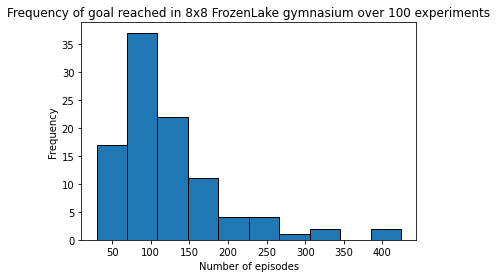

In [63]:
# using matplotlib to create a histogram
plt.hist(goal_reached9,bins=10, edgecolor = "black")

# add labels and title to the histogram
plt.xlabel('Number of episodes')#giving label for the x axis
plt.ylabel('Frequency')#giving label for the y axis
plt.title('Frequency of goal reached in 8x8 FrozenLake gymnasium over 100 experiments')#giving the title for the plot
# display the histogram
plt.show()